Output folder created or exists: models1
Loaded 12 diseases from chatbot_medical_data.json
Created synthetic dataset with 2400 samples

Processing synthetic dataset...
Saved symptom prevalence plot to models1\symptom_prevalence_synthetic.png


<Figure size 1600x800 with 0 Axes>

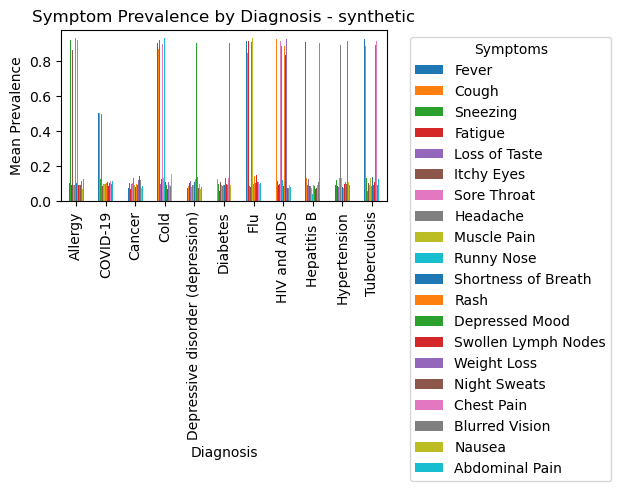

Saved diagnosis distribution plot to models1\diagnosis_distribution_synthetic.png


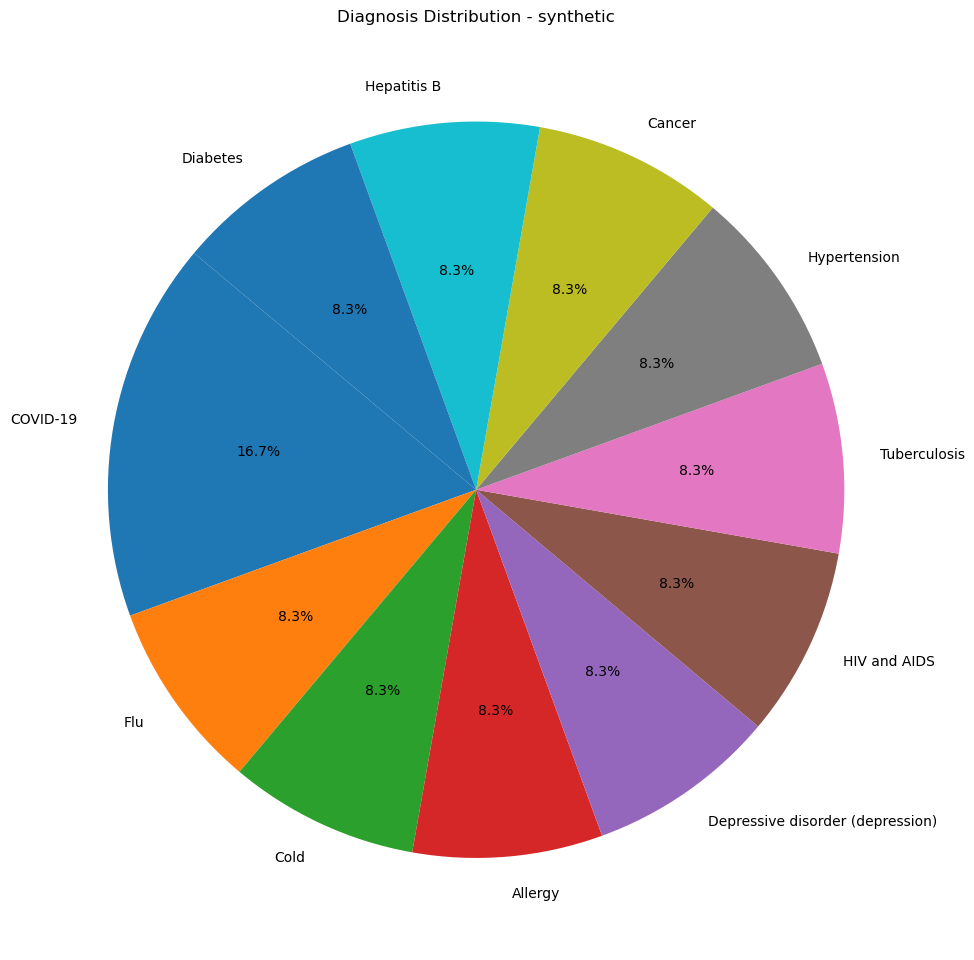

Saved Random Forest model to models1\rf_model_synthetic.pkl
Epoch 1/50
48/48 [==============================] - 2s 9ms/step - loss: 2.8897 - accuracy: 0.1133 - val_loss: 2.3889 - val_accuracy: 0.1042 - lr: 5.0000e-04
Epoch 2/50
48/48 [==============================] - 0s 3ms/step - loss: 2.4732 - accuracy: 0.1836 - val_loss: 2.2560 - val_accuracy: 0.2396 - lr: 5.0000e-04
Epoch 3/50
48/48 [==============================] - 0s 3ms/step - loss: 2.1779 - accuracy: 0.2650 - val_loss: 2.2127 - val_accuracy: 0.2448 - lr: 5.0000e-04
Epoch 4/50
48/48 [==============================] - 0s 3ms/step - loss: 1.9836 - accuracy: 0.3262 - val_loss: 2.0017 - val_accuracy: 0.3464 - lr: 5.0000e-04
Epoch 5/50
48/48 [==============================] - 0s 3ms/step - loss: 1.8761 - accuracy: 0.3887 - val_loss: 1.8872 - val_accuracy: 0.4062 - lr: 5.0000e-04
Epoch 6/50
48/48 [==============================] - 0s 2ms/step - loss: 1.7909 - accuracy: 0.4056 - val_loss: 1.7409 - val_accuracy: 0.4453 - lr: 5.0000e-0

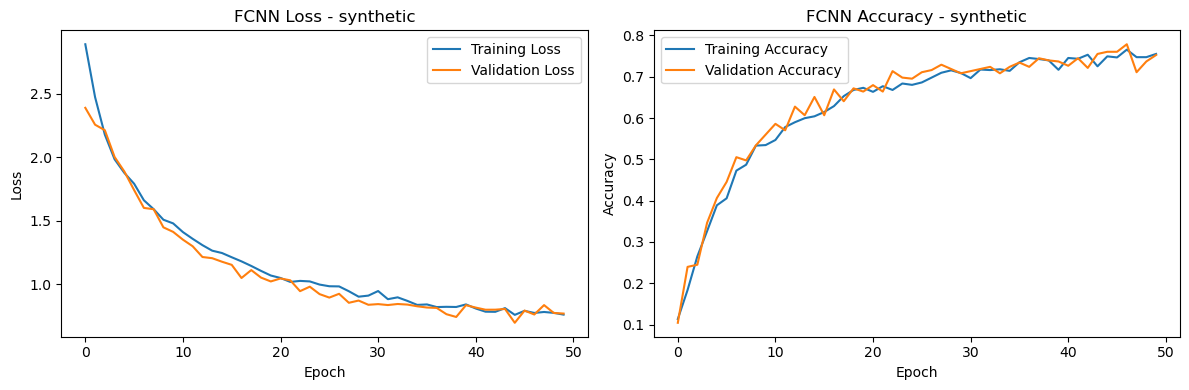

Saved Fully Connected model to models1\fc_model_synthetic.h5
Epoch 1/50
48/48 [==============================] - 2s 11ms/step - loss: 2.3899 - accuracy: 0.1393 - val_loss: 2.3812 - val_accuracy: 0.1719
Epoch 2/50
48/48 [==============================] - 0s 5ms/step - loss: 2.3614 - accuracy: 0.2214 - val_loss: 2.3192 - val_accuracy: 0.2109
Epoch 3/50
48/48 [==============================] - 0s 5ms/step - loss: 2.2427 - accuracy: 0.2285 - val_loss: 2.0559 - val_accuracy: 0.2943
Epoch 4/50
48/48 [==============================] - 0s 5ms/step - loss: 2.0497 - accuracy: 0.2702 - val_loss: 1.7165 - val_accuracy: 0.4036
Epoch 5/50
48/48 [==============================] - 0s 5ms/step - loss: 1.9416 - accuracy: 0.2975 - val_loss: 1.6327 - val_accuracy: 0.3750
Epoch 6/50
48/48 [==============================] - 0s 6ms/step - loss: 1.8134 - accuracy: 0.3203 - val_loss: 1.5896 - val_accuracy: 0.4062
Epoch 7/50
48/48 [==============================] - 0s 5ms/step - loss: 1.7219 - accuracy: 0.3301 

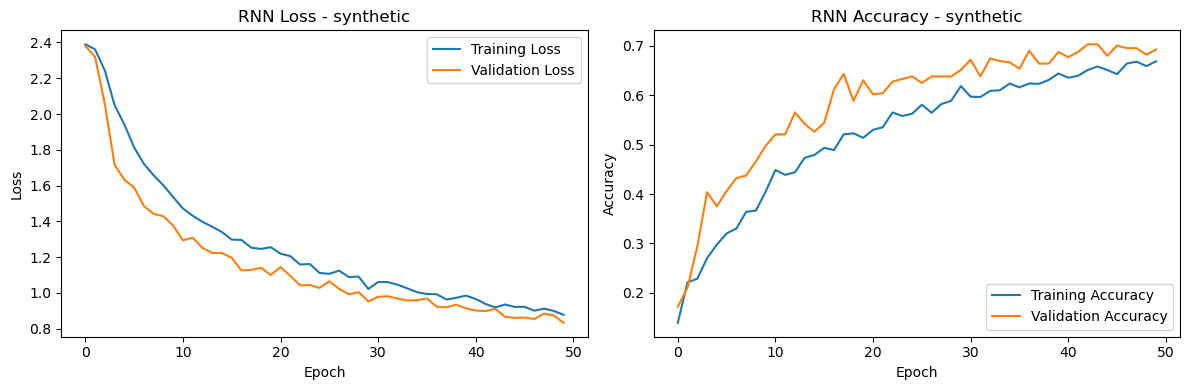

Saved RNN model to models1\rnn_model_synthetic.h5
Epoch 1/50
48/48 [==============================] - 2s 7ms/step - loss: 2.3978 - accuracy: 0.2155 - val_loss: 2.3412 - val_accuracy: 0.2344 - lr: 5.0000e-04
Epoch 2/50
48/48 [==============================] - 0s 4ms/step - loss: 1.6865 - accuracy: 0.3958 - val_loss: 2.2541 - val_accuracy: 0.2240 - lr: 5.0000e-04
Epoch 3/50
48/48 [==============================] - 0s 3ms/step - loss: 1.3856 - accuracy: 0.5163 - val_loss: 2.1627 - val_accuracy: 0.2865 - lr: 5.0000e-04
Epoch 4/50
48/48 [==============================] - 0s 4ms/step - loss: 1.2546 - accuracy: 0.5775 - val_loss: 2.0525 - val_accuracy: 0.3438 - lr: 5.0000e-04
Epoch 5/50
48/48 [==============================] - 0s 4ms/step - loss: 1.1359 - accuracy: 0.6152 - val_loss: 1.8823 - val_accuracy: 0.4062 - lr: 5.0000e-04
Epoch 6/50
48/48 [==============================] - 0s 3ms/step - loss: 1.0552 - accuracy: 0.6250 - val_loss: 1.6806 - val_accuracy: 0.5156 - lr: 5.0000e-04
Epoch 7/

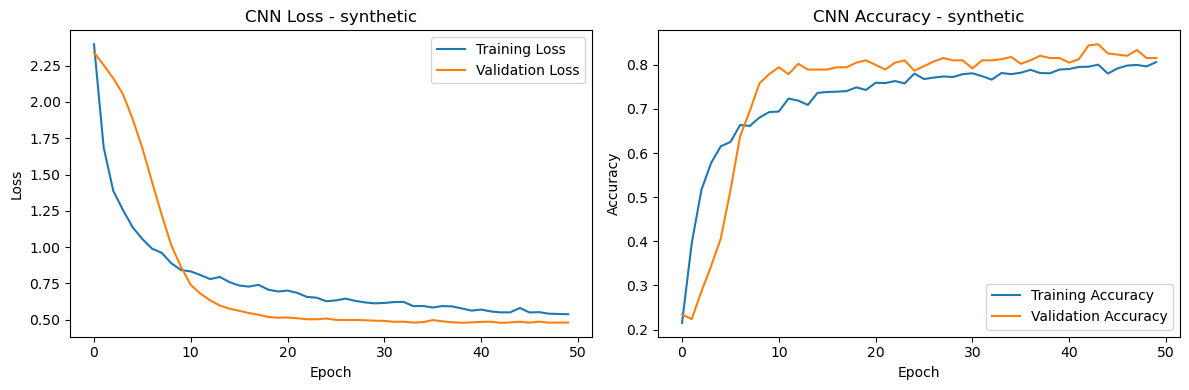

Saved CNN model to models1\cnn_model_synthetic.h5
Saved label encoder to models1\label_encoder_synthetic.pkl
Saved model metrics comparison plot to models1\model_metrics_comparison_synthetic.png


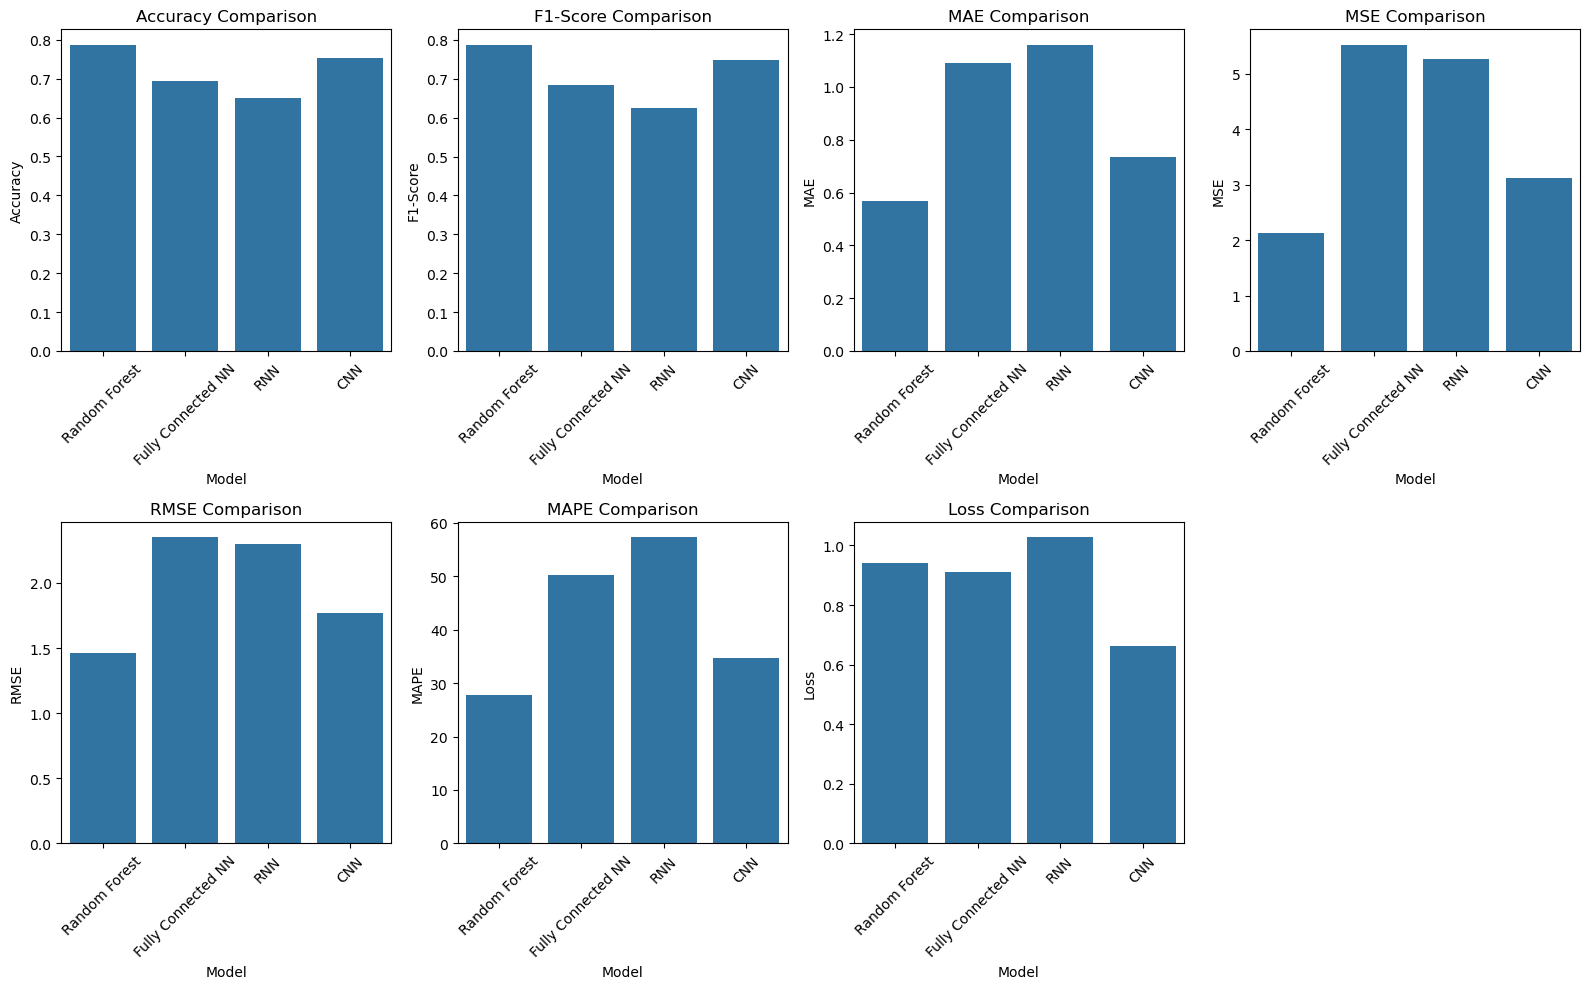


Model Comparison for Synthetic Dataset:
                Model  Accuracy  F1-Score       MAE       MSE      RMSE  \
0       Random Forest  0.787500  0.787741  0.568750  2.131250  1.459880   
1  Fully Connected NN  0.693750  0.684233  1.089583  5.527083  2.350975   
2                 RNN  0.650000  0.625812  1.160417  5.272917  2.296283   
3                 CNN  0.752083  0.748347  0.735417  3.127083  1.768356   

        MAPE      Loss  
0  27.843825  0.941082  
1  50.238005  0.912349  
2  57.278122  1.027624  
3  34.598554  0.663263  


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import json
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, mean_squared_error, log_loss
from sklearn.preprocessing import LabelEncoder
from math import sqrt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define output folder and JSON path
output_folder = r"models1"
json_path = r"chatbot_medical_data.json"

# Create output folder and verify
try:
    os.makedirs(output_folder, exist_ok=True)
    print(f"Output folder created or exists: {output_folder}")
except Exception as e:
    print(f"Error creating output folder {output_folder}: {e}")
    raise

# Load chatbot_medical_data.json
try:
    with open(json_path, 'r', encoding='utf-8') as f:
        medical_data = json.load(f)
    print(f"Loaded {len(medical_data)} diseases from {json_path}")
except FileNotFoundError:
    print(f"Error: {json_path} not found")
    raise
except Exception as e:
    print(f"Error loading {json_path}: {e}")
    raise

# Standardize disease names (merge COVID-19 and Coronavirus disease)
for disease in medical_data:
    if disease['name'] == "Coronavirus disease (COVID-19)":
        disease['name'] = "COVID-19"

# Define symptom mapping based on chatbot_medical_data.json
symptom_map = {
    'Fever': ['fever', 'high temperature', 'hot', 'yellowing of the skin and eyes (jaundice)'],
    'Cough': ['cough', 'coughing', 'prolonged cough', 'cough (sometimes with blood)'],
    'Sneezing': ['sneeze', 'sneezing'],
    'Fatigue': ['fatigue', 'tired', 'exhausted', 'feeling very tired', 'weakness'],
    'Loss of Taste': ['loss of taste', 'no taste', 'taste loss', 'lost my sense of taste'],
    'Itchy Eyes': ['itchy eyes', 'eye itch', 'eyes itching'],
    'Sore Throat': ['sore throat', 'throat pain'],
    'Headache': ['headache', 'head pain'],
    'Muscle Pain': ['muscle pain', 'body ache'],
    'Runny Nose': ['runny nose', 'nasal congestion'],
    'Shortness of Breath': ['shortness of breath', 'difficulty breathing'],
    'Rash': ['rash', 'skin rash'],
    'Depressed Mood': ['depressed mood', 'sadness', 'empty', 'loss of pleasure', 'loss of interest'],
    'Swollen Lymph Nodes': ['swollen lymph nodes'],
    'Weight Loss': ['weight loss', 'unintentional weight loss'],
    'Night Sweats': ['night sweats'],
    'Chest Pain': ['chest pain'],
    'Blurred Vision': ['blurred vision', 'vision loss'],
    'Nausea': ['nausea', 'vomiting'],
    'Abdominal Pain': ['pain in the abdomen', 'abdominal pain']
}
symptom_columns = list(symptom_map.keys())

# Function to parse symptoms from text
def parse_symptoms(text):
    symptoms = [0] * len(symptom_columns)
    text = text.lower()
    
    for i, (symptom, keywords) in enumerate(symptom_map.items()):
        for keyword in keywords:
            if keyword in text:
                symptoms[i] = 1
                break
    
    return symptoms

# Create synthetic dataset
def create_synthetic_dataset(medical_data, samples_per_disease=200):
    data = []
    for disease in medical_data:
        disease_name = disease['name']
        symptoms = disease['symptoms']
        # Convert symptom list to a single string for parsing
        symptom_text = ' '.join([s.lower() for s in symptoms])
        
        for _ in range(samples_per_disease):
            # Parse base symptoms
            symptom_vector = parse_symptoms(symptom_text)
            # Add noise: randomly flip 10% of symptoms to simulate variability
            for i in range(len(symptom_vector)):
                if np.random.random() < 0.1:
                    symptom_vector[i] = 1 - symptom_vector[i]
            data.append([disease_name] + symptom_vector)
    
    # Create DataFrame
    columns = ['Diagnosis'] + symptom_columns
    df = pd.DataFrame(data, columns=columns)
    return df

# Generate synthetic dataset
data = create_synthetic_dataset(medical_data)
print(f"Created synthetic dataset with {len(data)} samples")

# Visualize data distribution
def visualize_data_distribution(data, dataset_id="synthetic"):
    prevalence = data.groupby('Diagnosis')[symptom_columns].mean()
    
    plt.figure(figsize=(16, 8))
    prevalence.plot(kind='bar', stacked=False)
    plt.title(f'Symptom Prevalence by Diagnosis - {dataset_id}')
    plt.xlabel('Diagnosis')
    plt.ylabel('Mean Prevalence')
    plt.legend(title='Symptoms', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    try:
        plt.savefig(os.path.join(output_folder, f'symptom_prevalence_{dataset_id}.png'))
        print(f"Saved symptom prevalence plot to {os.path.join(output_folder, f'symptom_prevalence_{dataset_id}.png')}")
    except Exception as e:
        print(f"Error saving symptom prevalence plot: {e}")
    plt.show()
    
    diagnosis_counts = data['Diagnosis'].value_counts()
    plt.figure(figsize=(10, 10))
    plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Diagnosis Distribution - {dataset_id}')
    plt.tight_layout()
    try:
        plt.savefig(os.path.join(output_folder, f'diagnosis_distribution_{dataset_id}.png'))
        print(f"Saved diagnosis distribution plot to {os.path.join(output_folder, f'diagnosis_distribution_{dataset_id}.png')}")
    except Exception as e:
        print(f"Error saving diagnosis distribution plot: {e}")
    plt.show()

# Function to compute MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero = y_true != 0
    if np.sum(non_zero) == 0:
        return np.nan
    return np.mean(np.abs((y_true[non_zero] - y_pred[non_zero]) / y_true[non_zero])) * 100

# Function to train and evaluate Random Forest
def train_rf(X_train, X_test, y_train, y_test, y_test_one_hot, dataset_id):
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    rf_pred_probs = rf_model.predict_proba(X_test)
    rf_accuracy = accuracy_score(y_test, rf_pred)
    rf_f1 = f1_score(y_test, rf_pred, average='weighted')
    rf_mae = mean_absolute_error(y_test, rf_pred)
    rf_mse = mean_squared_error(y_test, rf_pred)
    rf_rmse = sqrt(rf_mse)
    rf_mape = mean_absolute_percentage_error(y_test, rf_pred)
    rf_loss = log_loss(y_test_one_hot, rf_pred_probs)
    
    try:
        joblib.dump(rf_model, os.path.join(output_folder, f'rf_model_{dataset_id}.pkl'))
        print(f"Saved Random Forest model to {os.path.join(output_folder, f'rf_model_{dataset_id}.pkl')}")
    except Exception as e:
        print(f"Error saving Random Forest model for {dataset_id}: {e}")
        raise
    return rf_model, rf_accuracy, rf_f1, rf_mae, rf_mse, rf_rmse, rf_mape, rf_loss

# Function to train and evaluate Fully Connected Neural Network
def train_fc(X_train_dl, X_test_dl, y_train_dl, y_test, y_test_one_hot, X, label_encoder, dataset_id):
    def build_fc_model():
        inputs = tf.keras.Input(shape=(X.shape[1],))
        x = layers.Dense(64, activation='relu')(inputs)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.3)(x, training=True)
        x = layers.Dense(32, activation='relu')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.3)(x, training=True)
        x = layers.Dense(16, activation='relu')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.3)(x, training=True)
        outputs = layers.Dense(len(label_encoder.classes_), activation='softmax')(x)
        return tf.keras.Model(inputs, outputs)
    
    fc_model = build_fc_model()
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
    fc_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
    history = fc_model.fit(X_train_dl, y_train_dl, epochs=50, batch_size=32, verbose=1, 
                          validation_split=0.2, callbacks=[lr_scheduler])
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'FCNN Loss - {dataset_id}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'FCNN Accuracy - {dataset_id}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    try:
        plt.savefig(os.path.join(output_folder, f'fcnn_training_plot_{dataset_id}.png'))
        print(f"Saved FCNN training plot to {os.path.join(output_folder, f'fcnn_training_plot_{dataset_id}.png')}")
    except Exception as e:
        print(f"Error saving FCNN training plot for {dataset_id}: {e}")
    plt.show()
    
    fc_pred_probs = fc_model.predict(X_test_dl, verbose=0)
    fc_pred = np.argmax(fc_pred_probs, axis=1)
    fc_accuracy = accuracy_score(y_test, fc_pred)
    fc_f1 = f1_score(y_test, fc_pred, average='weighted')
    fc_mae = mean_absolute_error(y_test, fc_pred)
    fc_mse = mean_squared_error(y_test, fc_pred)
    fc_rmse = sqrt(fc_mse)
    fc_mape = mean_absolute_percentage_error(y_test, fc_pred)
    fc_loss = log_loss(y_test_one_hot, fc_pred_probs)
    
    try:
        fc_model.save(os.path.join(output_folder, f'fc_model_{dataset_id}.h5'))
        print(f"Saved Fully Connected model to {os.path.join(output_folder, f'fc_model_{dataset_id}.h5')}")
    except Exception as e:
        print(f"Error saving Fully Connected model for {dataset_id}: {e}")
        raise
    return fc_model, fc_accuracy, fc_f1, fc_mae, fc_mse, fc_rmse, fc_mape, fc_loss, history

# Function to train and evaluate RNN
def train_rnn(X_train_rnn, X_test_rnn, y_train_dl, y_test, y_test_one_hot, label_encoder, dataset_id):
    def build_rnn_model():
        inputs = tf.keras.Input(shape=(len(symptom_columns), 1))
        x = layers.LSTM(32, activation='relu', return_sequences=False)(inputs)
        x = layers.Dropout(0.3)(x)
        outputs = layers.Dense(len(label_encoder.classes_), activation='softmax')(x)
        return tf.keras.Model(inputs, outputs)
    
    rnn_model = build_rnn_model()
    rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = rnn_model.fit(X_train_rnn, y_train_dl, epochs=50, batch_size=32, verbose=1, validation_split=0.2)
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'RNN Loss - {dataset_id}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'RNN Accuracy - {dataset_id}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    try:
        plt.savefig(os.path.join(output_folder, f'rnn_training_plot_{dataset_id}.png'))
        print(f"Saved RNN training plot to {os.path.join(output_folder, f'rnn_training_plot_{dataset_id}.png')}")
    except Exception as e:
        print(f"Error saving RNN training plot for {dataset_id}: {e}")
    plt.show()
    
    rnn_pred_probs = rnn_model.predict(X_test_rnn, verbose=0)
    rnn_pred = np.argmax(rnn_pred_probs, axis=1)
    rnn_accuracy = accuracy_score(y_test, rnn_pred)
    rnn_f1 = f1_score(y_test, rnn_pred, average='weighted')
    rnn_mae = mean_absolute_error(y_test, rnn_pred)
    rnn_mse = mean_squared_error(y_test, rnn_pred)
    rnn_rmse = sqrt(rnn_mse)
    rnn_mape = mean_absolute_percentage_error(y_test, rnn_pred)
    rnn_loss = log_loss(y_test_one_hot, rnn_pred_probs)
    
    try:
        rnn_model.save(os.path.join(output_folder, f'rnn_model_{dataset_id}.h5'))
        print(f"Saved RNN model to {os.path.join(output_folder, f'rnn_model_{dataset_id}.h5')}")
    except Exception as e:
        print(f"Error saving RNN model for {dataset_id}: {e}")
        raise
    return rnn_model, rnn_accuracy, rnn_f1, rnn_mae, rnn_mse, rnn_rmse, rnn_mape, rnn_loss

# Function to train and evaluate CNN
def train_cnn(X_train_cnn, X_test_cnn, y_train_dl, y_test, y_test_one_hot, label_encoder, dataset_id):
    def build_cnn_model():
        inputs = tf.keras.Input(shape=(len(symptom_columns), 1))
        x = layers.Conv1D(32, kernel_size=3, activation='relu', padding='same')(inputs)
        x = layers.BatchNormalization()(x)
        x = layers.MaxPooling1D(pool_size=2)(x)
        x = layers.Conv1D(16, kernel_size=3, activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Flatten()(x)
        x = layers.Dense(16, activation='relu')(x)
        x = layers.Dropout(0.3)(x)
        outputs = layers.Dense(len(label_encoder.classes_), activation='softmax')(x)
        return tf.keras.Model(inputs, outputs)
    
    cnn_model = build_cnn_model()
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
    cnn_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
    history = cnn_model.fit(X_train_cnn, y_train_dl, epochs=50, batch_size=32, verbose=1, 
                           validation_split=0.2, callbacks=[lr_scheduler])
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'CNN Loss - {dataset_id}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'CNN Accuracy - {dataset_id}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    try:
        plt.savefig(os.path.join(output_folder, f'cnn_training_plot_{dataset_id}.png'))
        print(f"Saved CNN training plot to {os.path.join(output_folder, f'cnn_training_plot_{dataset_id}.png')}")
    except Exception as e:
        print(f"Error saving CNN training plot for {dataset_id}: {e}")
    plt.show()
    
    cnn_pred_probs = cnn_model.predict(X_test_cnn, verbose=0)
    cnn_pred = np.argmax(cnn_pred_probs, axis=1)
    cnn_accuracy = accuracy_score(y_test, cnn_pred)
    cnn_f1 = f1_score(y_test, cnn_pred, average='weighted')
    cnn_mae = mean_absolute_error(y_test, cnn_pred)
    cnn_mse = mean_squared_error(y_test, cnn_pred)
    cnn_rmse = sqrt(cnn_mse)
    cnn_mape = mean_absolute_percentage_error(y_test, cnn_pred)
    cnn_loss = log_loss(y_test_one_hot, cnn_pred_probs)
    
    try:
        cnn_model.save(os.path.join(output_folder, f'cnn_model_{dataset_id}.h5'))
        print(f"Saved CNN model to {os.path.join(output_folder, f'cnn_model_{dataset_id}.h5')}")
    except Exception as e:
        print(f"Error saving CNN model for {dataset_id}: {e}")
        raise
    return cnn_model, cnn_accuracy, cnn_f1, cnn_mae, cnn_mse, cnn_rmse, cnn_mape, cnn_loss

# Function to plot model comparison
def plot_model_comparison(results, dataset_id, metrics=['Accuracy', 'F1-Score', 'MAE', 'MSE', 'RMSE', 'MAPE', 'Loss']):
    plt.figure(figsize=(16, 10))
    for i, metric in enumerate(metrics):
        plt.subplot(2, 4, i+1)
        sns.barplot(x='Model', y=metric, data=results)
        plt.title(f'{metric} Comparison')
        plt.ylabel(metric)
        plt.xticks(rotation=45)
    plt.tight_layout()
    try:
        plt.savefig(os.path.join(output_folder, f'model_metrics_comparison_{dataset_id}.png'))
        print(f"Saved model metrics comparison plot to {os.path.join(output_folder, f'model_metrics_comparison_{dataset_id}.png')}")
    except Exception as e:
        print(f"Error saving model metrics comparison plot: {e}")
    plt.show()

# Process synthetic dataset
print("\nProcessing synthetic dataset...")
dataset_id = "synthetic"

# Visualize data distribution
visualize_data_distribution(data, dataset_id)

X = data[symptom_columns]
y = data['Diagnosis']

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_one_hot = tf.keras.utils.to_categorical(y_encoded)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Reshape for RNN and CNN
X_train_rnn = X_train_dl.values.reshape(-1, len(symptom_columns), 1)
X_test_rnn = X_test_dl.values.reshape(-1, len(symptom_columns), 1)
X_train_cnn = X_train_rnn
X_test_cnn = X_test_rnn

# Train and evaluate each model
rf_model, rf_accuracy, rf_f1, rf_mae, rf_mse, rf_rmse, rf_mape, rf_loss = train_rf(
    X_train, X_test, y_train, y_test, y_test_dl, dataset_id)
fc_model, fc_accuracy, fc_f1, fc_mae, fc_mse, fc_rmse, fc_mape, fc_loss, fc_history = train_fc(
    X_train_dl, X_test_dl, y_train_dl, y_test, y_test_dl, X, label_encoder, dataset_id)
rnn_model, rnn_accuracy, rnn_f1, rnn_mae, rnn_mse, rnn_rmse, rnn_mape, rnn_loss = train_rnn(
    X_train_rnn, X_test_rnn, y_train_dl, y_test, y_test_dl, label_encoder, dataset_id)
cnn_model, cnn_accuracy, cnn_f1, cnn_mae, cnn_mse, cnn_rmse, cnn_mape, cnn_loss = train_cnn(
    X_train_cnn, X_test_cnn, y_train_dl, y_test, y_test_dl, label_encoder, dataset_id)

# Save label encoder
try:
    joblib.dump(label_encoder, os.path.join(output_folder, f'label_encoder_{dataset_id}.pkl'))
    print(f"Saved label encoder to {os.path.join(output_folder, f'label_encoder_{dataset_id}.pkl')}")
except Exception as e:
    print(f"Error saving label encoder for {dataset_id}: {e}")
    raise

# Collect results
results = pd.DataFrame({
    'Model': ['Random Forest', 'Fully Connected NN', 'RNN', 'CNN'],
    'Accuracy': [rf_accuracy, fc_accuracy, rnn_accuracy, cnn_accuracy],
    'F1-Score': [rf_f1, fc_f1, rnn_f1, cnn_f1],
    'MAE': [rf_mae, fc_mae, rnn_mae, cnn_mae],
    'MSE': [rf_mse, fc_mse, rnn_mse, cnn_mse],
    'RMSE': [rf_rmse, fc_rmse, rnn_rmse, cnn_rmse],
    'MAPE': [rf_mape, fc_mape, rnn_mape, cnn_mape],
    'Loss': [rf_loss, fc_loss, rnn_loss, cnn_loss]
})

# Plot model comparison
plot_model_comparison(results, dataset_id)

print("\nModel Comparison for Synthetic Dataset:")
print(results)

     Hello! I am your virtual health assistant robot.
Using RNN model.
Please describe your symptoms (e.g., 'I have a fever and cough') or type 'ask' to answer Y/N questions:

No symptoms detected in your description. Falling back to Y/N questions.

Please answer the following questions with Y/N:
Symptom vector: [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1]

     Diagnosis with Probabilities and Uncertainty:
Allergy: P=0.001, Uncertainty=0.003
COVID-19: P=0.932, Uncertainty=0.122
Cancer: P=0.002, Uncertainty=0.011
Cold: P=0.024, Uncertainty=0.043
Depressive disorder (depression): P=0.002, Uncertainty=0.009
Diabetes: P=0.002, Uncertainty=0.016
Flu: P=0.000, Uncertainty=0.000
HIV and AIDS: P=0.008, Uncertainty=0.027
Hepatitis B: P=0.027, Uncertainty=0.102
Hypertension: P=0.000, Uncertainty=0.000
Tuberculosis: P=0.002, Uncertainty=0.013

         Diagnosis: COVID-19 (±0.122)
   Tests: PCR test; Rapid antigen test
   Treatments: Isolation; Paracetamol; Consult doctor


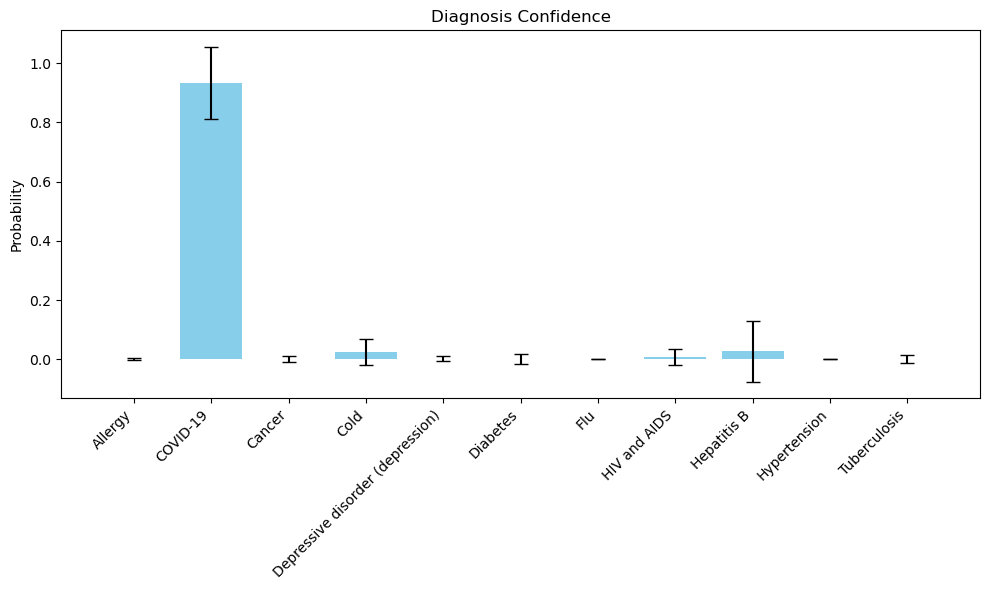

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pyttsx3
import os
import json
from sklearn.preprocessing import LabelEncoder
import joblib

# Define symptom mapping
symptom_map = {
    'Fever': ['fever', 'high temperature', 'hot', 'yellowing of the skin and eyes (jaundice)'],
    'Cough': ['cough', 'coughing', 'prolonged cough', 'cough (sometimes with blood)'],
    'Sneezing': ['sneeze', 'sneezing'],
    'Fatigue': ['fatigue', 'tired', 'exhausted', 'feeling very tired', 'weakness'],
    'Loss of Taste': ['loss of taste', 'no taste', 'taste loss', 'lost my sense of taste'],
    'Itchy Eyes': ['itchy eyes', 'eye itch', 'eyes itching'],
    'Sore Throat': ['sore throat', 'throat pain'],
    'Headache': ['headache', 'head pain'],
    'Muscle Pain': ['muscle pain', 'body ache'],
    'Runny Nose': ['runny nose', 'nasal congestion'],
    'Shortness of Breath': ['shortness of breath', 'difficulty breathing'],
    'Rash': ['rash', 'skin rash'],
    'Depressed Mood': ['depressed mood', 'sadness', 'empty', 'loss of pleasure', 'loss of interest'],
    'Swollen Lymph Nodes': ['swollen lymph nodes'],
    'Weight Loss': ['weight loss', 'unintentional weight loss'],
    'Night Sweats': ['night sweats'],
    'Chest Pain': ['chest pain'],
    'Blurred Vision': ['blurred vision', 'vision loss'],
    'Nausea': ['nausea', 'vomiting'],
    'Abdominal Pain': ['pain in the abdomen', 'abdominal pain']
}
symptom_names = list(symptom_map.keys())

# Define output folder
output_folder = r"models1"

# Speak function
def speak(text):
    try:
        engine = pyttsx3.init()
        engine.say(text)
        engine.runAndWait()
    except Exception as e:
        print(f"Speech error: {e}")

# Prediction with uncertainty
def predict_with_uncertainty(model, x, n_iter=100, is_rnn=False):
    if is_rnn:
        x = x.reshape(-1, len(symptom_names), 1)
    preds = np.array([model(x, training=True).numpy() for _ in range(n_iter)])
    mean = preds.mean(axis=0)
    std = preds.std(axis=0)
    return mean, std

# Function to parse symptoms from text
def parse_symptoms(text):
    symptoms = [0] * len(symptom_names)
    text = text.lower()
    
    for i, (symptom, keywords) in enumerate(symptom_map.items()):
        for keyword in keywords:
            if keyword in text:
                symptoms[i] = 1
                break
    
    return symptoms

# Run virtual robot (with option to use RNN)
def run_virtual_robot(use_rnn=False):
    print("     Hello! I am your virtual health assistant robot.")
    print(f"Using {'RNN' if use_rnn else 'Fully Connected NN'} model.")
    print("Please describe your symptoms (e.g., 'I have a fever and cough') or type 'ask' to answer Y/N questions:")
    
    # Load model
    try:
        if use_rnn:
            model = tf.keras.models.load_model(os.path.join(output_folder, 'rnn_model_synthetic.h5'))
        else:
            model = tf.keras.models.load_model(os.path.join(output_folder, 'fc_model_synthetic.h5'))
    except Exception as e:
        print(f"Error loading model: {e}")
        return
    
    # Load label encoder
    try:
        label_encoder = joblib.load(os.path.join(output_folder, 'label_encoder_synthetic.pkl'))
    except Exception as e:
        print(f"Error loading label encoder: {e}")
        return
    
    user_input = input("Your symptoms: ").strip().lower()
    input_symptoms = None
    
    if user_input != 'ask':
        input_symptoms = parse_symptoms(user_input)
        if sum(input_symptoms) > 0:
            print("\nDetected symptoms:", [name for i, name in enumerate(symptom_names) if input_symptoms[i] == 1])
            print(f"Symptom vector: {input_symptoms}")
        else:
            print("\nNo symptoms detected in your description. Falling back to Y/N questions.")
            user_input = 'ask'
    
    if user_input == 'ask':
        input_symptoms = []
        print("\nPlease answer the following questions with Y/N:")
        for name in symptom_names:
            ans = input(f"Do you have {name}? (Y/N): ").strip().lower()
            input_symptoms.append(1 if ans == 'y' else 0)
        print(f"Symptom vector: {input_symptoms}")
    
    input_array = np.array([input_symptoms], dtype=np.float32)
    mean_probs, std_probs = predict_with_uncertainty(model, input_array, is_rnn=use_rnn)
    most_likely = np.argmax(mean_probs)
    diagnosis = label_encoder.classes_[most_likely]
    
    print("\n     Diagnosis with Probabilities and Uncertainty:")
    for i, dis in enumerate(label_encoder.classes_):
        print(f"{dis}: P={mean_probs[0][i]:.3f}, Uncertainty={std_probs[0][i]:.3f}")
    
    speak(f"You may have {diagnosis}.")
    print(f"\n         Diagnosis: {diagnosis} (±{std_probs[0][most_likely]:.3f})")
    
     # Get up to 3 tests and treatments from JSON
    tests = ["Consult a healthcare professional for appropriate testing."]
    medicines = ["Consult a healthcare professional for treatment options."]
    for disease in medical_data:
        if disease['name'] == diagnosis:
            if disease['tests']:
                tests = disease['tests'][:3] if len(disease['tests']) > 3 else disease['tests'][:3]
            if disease['treatments']:
                medicines = disease['treatments'][:3] if len(disease['treatments']) > 3 else disease['treatments'][:3]
            break
    
    # Join tests and treatments into strings
    test_str = "; ".join(tests)
    medicine_str = "; ".join(medicines)
    
    speak(f"I recommend you take the following tests: {test_str} and consider the following treatments: {medicine_str}")
    print(f"   Tests: {test_str}")
    print(f"   Treatments: {medicine_str}")
    
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(label_encoder.classes_, mean_probs[0], yerr=std_probs[0], capsize=5, color='skyblue')
    plt.ylabel("Probability")
    plt.title("Diagnosis Confidence")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Execute virtual robot (using RNN as requested)
run_virtual_robot(use_rnn=True)